<a href="https://colab.research.google.com/github/oyyarko/keras_tut/blob/master/CIFAR100_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from tensorflow.python.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.datasets import cifar100
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import numpy as np

In [11]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print('x train: ', x_train.shape[0])
print('x test', x_test.shape[0])

x train:  50000
x test 10000


In [0]:
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [13]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 512)         1180160   
_________________________________________

In [0]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

checkpointer = ModelCheckpoint(filepath='model.cifar100.best.hdf5', 
                              verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=64, epochs=50, verbose=2,
                callbacks=[checkpointer], validation_data=(x_valid, y_valid), shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50

Epoch 00001: val_loss improved from inf to 3.48369, saving model to model.cifar100.best.hdf5
45000/45000 - 9s - loss: 3.9148 - acc: 0.1101 - val_loss: 3.4837 - val_acc: 0.1828
Epoch 2/50

Epoch 00002: val_loss improved from 3.48369 to 2.86991, saving model to model.cifar100.best.hdf5
45000/45000 - 9s - loss: 3.0736 - acc: 0.2502 - val_loss: 2.8699 - val_acc: 0.2872
Epoch 3/50

Epoch 00003: val_loss did not improve from 2.86991
45000/45000 - 9s - loss: 2.6779 - acc: 0.3292 - val_loss: 3.3880 - val_acc: 0.2532
Epoch 4/50

Epoch 00004: val_loss did not improve from 2.86991
45000/45000 - 8s - loss: 2.4443 - acc: 0.3812 - val_loss: 3.5580 - val_acc: 0.2522
Epoch 5/50

Epoch 00005: val_loss improved from 2.86991 to 2.43100, saving model to model.cifar100.best.hdf5
45000/45000 - 9s - loss: 2.2823 - acc: 0.4168 - val_loss: 2.4310 - val_acc: 0.3936
Epoch 6/50

Epoch 00006: val_loss did not improve from 2.43100
45000/45000 - 8s - loss:

In [17]:
model.load_weights('model.cifar100.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy: ', score[1])


 Test accuracy:  0.4178


In [0]:
y_hat = model.predict(x_test)
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]
 

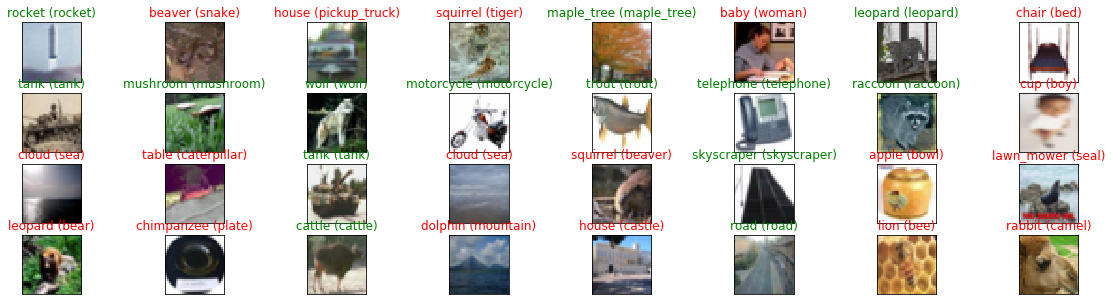

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(CIFAR100_LABELS_LIST[pred_idx], CIFAR100_LABELS_LIST[true_idx]),
                color=("green" if pred_idx == true_idx else "red"))